# Predicting King County House Prices
---- 
### Blog Post: https://dev.to/rokaandy/logarithmic-transformation-in-linear-regression-models-why-when-3a7c

## Business Understanding:
1. What factors influence price the most?
2. What factors are feasible for renovation
3. How accurately can we predict the value these features will have on price?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

# Importing Data

### Source: King County Housing Data (9/9/2014 - 1/10/2015)


In [3]:
kc_data_full = pd.read_csv('../data/kc_house_data.csv')

# Data Preparation

After looking through the original data and assesing what data was going to be valuable to answer our question, we decided to drop the columns titled (id, yr_renovated, lat, and long). This gave us a smaller data set in which we then proceeded to clean by dropping NaN and ? values from the waterfront and view columns. 

In [6]:
from functions import create_models, create_heatmap, clean_housing_data, normalize_data

In [7]:
kc_data_full1 = clean_housing_data(kc_data_full)

#### Note: After dropping NaN records from waterfront and view, `kc_data_full` used to have 21,597 records, but now it has 19,164.

# Exploratory Data Analysis:
- Visualization
- OLS Model
- Multi-collinearity

## Visualization

Pairplot of Sqft Living, Bedrooms, Bathrooms in relation to Price.

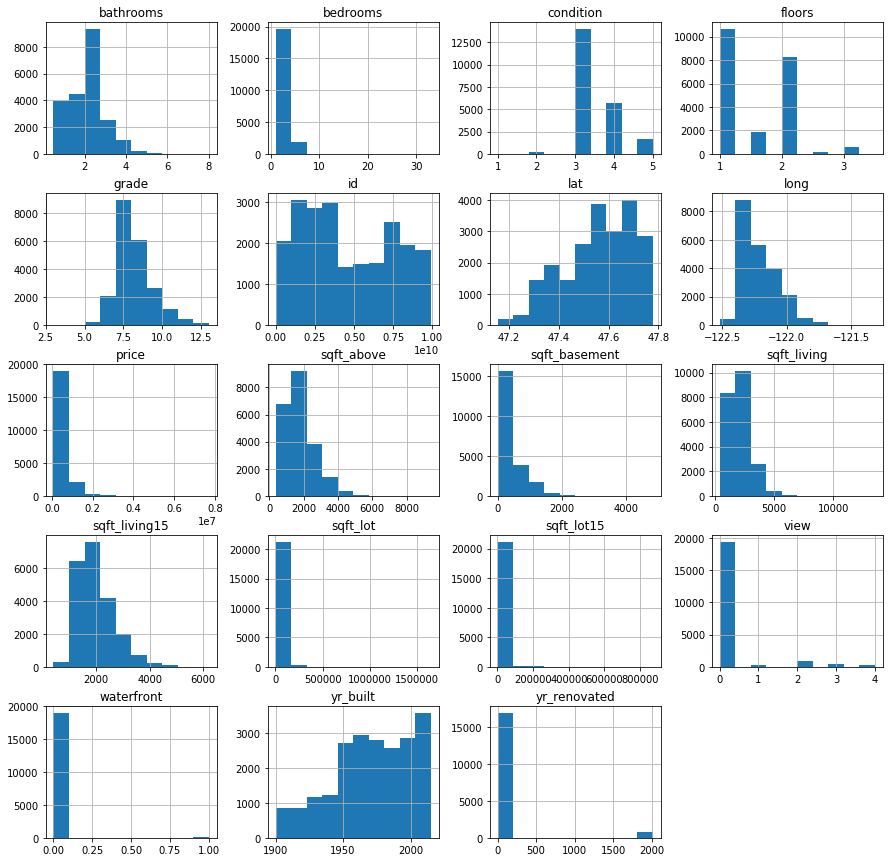

In [8]:
_=kc_data_full.hist(figsize=(15,15))

### Observations from the histograms above:
   Our target variable, price, is not a currently in a normal distribution. Most of the data appears to be skewed to the left side of the chart. We will have to normalize that data in order for our linear regression model to work properly. There are several other variables(sqft_living, bedrooms, yr_built) that we may normalize in order to see what change it has on our model.
   
   We also only used houses that were built after 1975, seeing as those houses would likley need rennovation, but are still likley to have a higher grade than house built before this time, and grade has a strong impact on the price. 

In [9]:
kc_train = kc_data_full1
#kc_train = kc_train.loc[kc_train['yr_built'] > 1975]

# log_sqft_living = np.log(kc_train['sqft_living'])
# log_bedrooms = np.log(kc_train['bedrooms'])
# log_yr_built = np.log(kc_train['yr_built'])

# kc_train['log_sqft'] = np.log(kc_train['sqft_living'])
# kc_train['log_bedrooms'] = np.log(kc_train['bedrooms'])
# kc_train['log_yr_built'] = np.log(kc_train['yr_built'])
# kc_train['price'] = np.log(kc_train['price'])

In [10]:
kc_train = normalize_data(kc_train)

In [11]:
kc_train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,log_sqft,log_bedrooms,log_yr_built
1,12/9/2014,13.195614,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,1690,7639,7.851661,1.098612,7.576097
2,2/25/2015,12.100712,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,2720,8062,6.646391,0.693147,7.566828
3,12/9/2014,13.311329,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,1360,5000,7.580700,1.386294,7.583248
4,2/18/2015,13.142166,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,1800,7503,7.426549,1.098612,7.594381
5,5/12/2014,14.022525,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,98053,4760,101930,8.597851,1.386294,7.601402


/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


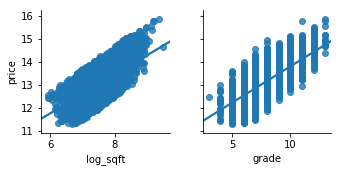

In [12]:
_=sns.pairplot(kc_train,x_vars=['log_sqft','grade'], y_vars='price', kind='reg')
plt.savefig('pairplot_graph.png')

We used this pairplot in order to vizualize and understand if there were linear relationships between these variables and price.

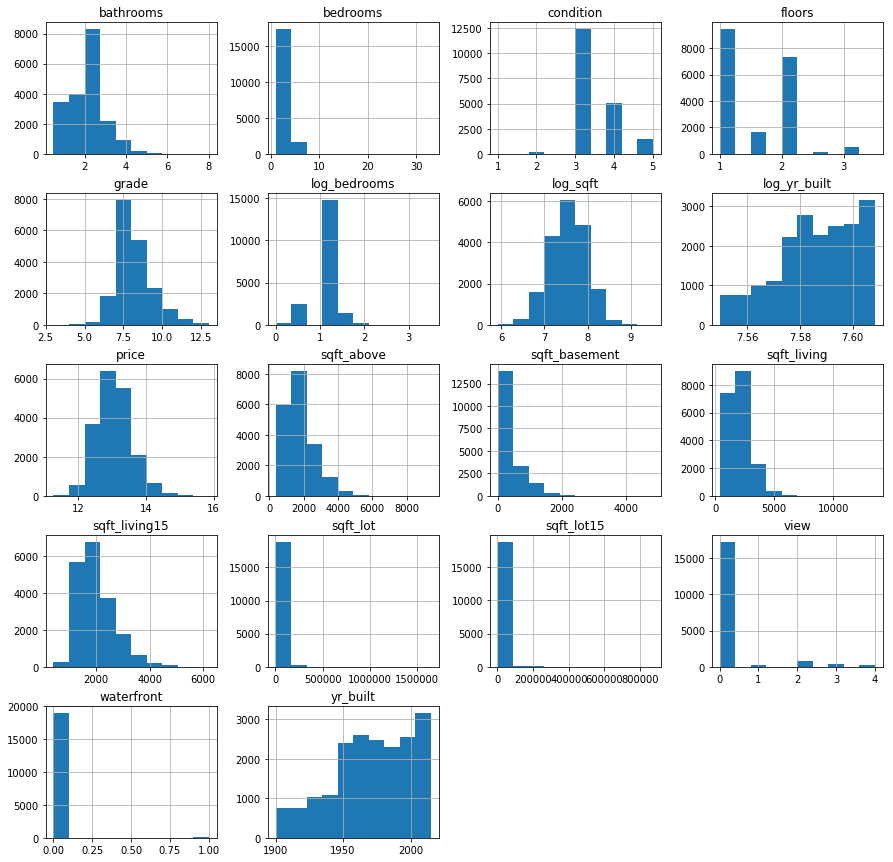

In [13]:
_=kc_train.hist(figsize=(15,15))

##### This visual displays that after we normalized the features `'log_sqft', 'price', 'log_bedrooms, 'log_yr_built'` that they are all shaped in a much more normal distribution

## Multi-Collinearity of Features 

#### Visualizing multi-collinearity will help us avoid over-fitting our model on our training data. 

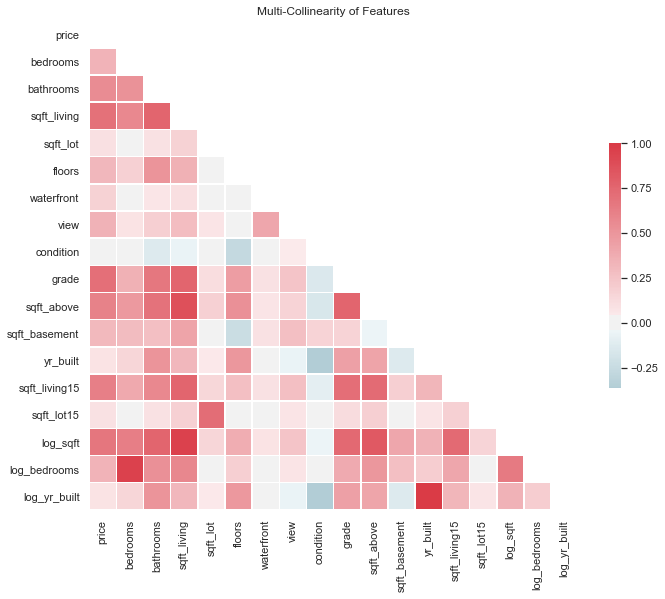

In [14]:
create_heatmap(kc_train)

##### This is another representation of the colinearity of variables. Collineariyt is measured on a scaled from (-1 to 1). Values closer to these edges represent higher collinearity. 

In [15]:
(kc_train.iloc[:, 1:]).corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,log_sqft,log_bedrooms,log_yr_built
price,1.000000,0.344325,0.551805,0.696487,0.099098,0.313839,0.178724,0.346509,0.038745,0.704569,0.605287,0.309313,0.081926,0.617588,0.091618,0.674748,0.344007,0.080317
bedrooms,0.344325,1.000000,0.516137,0.577972,0.029685,0.181909,-0.004082,0.083542,0.025047,0.359619,0.480400,0.295875,0.157011,0.392586,0.028005,0.622337,0.957289,0.157033
bathrooms,0.551805,0.516137,1.000000,0.755909,0.085666,0.506058,0.064608,0.186980,-0.126612,0.666475,0.687621,0.277739,0.507069,0.569443,0.086466,0.762426,0.527656,0.505485
sqft_living,0.696487,0.577972,0.755909,1.000000,0.173624,0.356938,0.107416,0.285976,-0.057704,0.763701,0.877669,0.427308,0.317123,0.755524,0.183177,0.953855,0.580738,0.316245
sqft_lot,0.099098,0.029685,0.085666,0.173624,1.000000,-0.007519,0.023164,0.071064,-0.013656,0.114968,0.184383,0.014532,0.055560,0.146576,0.721839,0.150559,0.031353,0.056042
floors,0.313839,0.181909,0.506058,0.356938,-0.007519,1.000000,0.021399,0.029147,-0.263421,0.458230,0.525039,-0.238997,0.490251,0.280229,-0.011145,0.371464,0.195912,0.486521
waterfront,0.178724,-0.004082,0.064608,0.107416,0.023164,0.021399,1.000000,0.406654,0.017175,0.085644,0.073500,0.085962,-0.026612,0.087257,0.031958,0.081905,-0.010320,-0.026475
view,0.346509,0.083542,0.186980,0.285976,0.071064,0.029147,0.406654,1.000000,0.047143,0.248898,0.168695,0.274985,-0.055862,0.276719,0.071207,0.247144,0.074639,-0.055646
condition,0.038745,0.025047,-0.126612,-0.057704,-0.013656,-0.263421,0.017175,0.047143,1.000000,-0.144898,-0.155922,0.166899,-0.361988,-0.092609,-0.004996,-0.048994,0.025464,-0.360654
grade,0.704569,0.359619,0.666475,0.763701,0.114968,0.458230,0.085644,0.248898,-0.144898,1.000000,0.757406,0.165213,0.446364,0.713765,0.120664,0.744456,0.385075,0.445202


#####  The chart here is stating that any feature that has a collinearity of .75 or higher should be dropped from the dataframe to possibly achieve a better predictability model. Hence, any coefficient that has the highest number of "True" should be analyzed.

In [16]:
abs(kc_train.corr()) > .75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,log_sqft,log_bedrooms,log_yr_built
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,True,False,True,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False


# Linear Regression Modeling

In [22]:
import sklearn
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Creating a function that will easily create and compares models. This will aid the parameter tuning portion of the experiment

In [19]:
# class RunLinearModels
#     def __init__(self, df):
#         '''Intializing RunLinearModels'''
#         self.df = df
#         self.X 
    
#     def train_test(self, self.df):
#         X = df[feature_cols]
#         y = df['price']
#         X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)
    
        
        

def create_models(df, feature_cols):
    '''This is a function that outputs the Intercept, Coefficients, 3 types of Errors, and R-Squared'''
    X = df[feature_cols]
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    print(f'Intercept of the regression line:',lr.intercept_)
    print(f'Coefficients:',lr.coef_)
    print('\n')
    
    y_pred = lr.predict(X_test)

    
#     print(f'Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#     print(f'Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
#     print(f'Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#     print(f'R-Squared:',round(lr.score(X,y),3))
#     print('\n')
    
    print(f'Mean Absolute Error exp:', np.exp(metrics.mean_absolute_error(y_test, y_pred)))
    print(f'Mean Squared Error exp:', np.exp(metrics.mean_squared_error(y_test, y_pred)))
    print(f'Root Mean Squared Error:', np.exp(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    predictions =  np.array(np.exp(lr.predict(X_test)))
    standardized_y= np.exp((y_test))
    print(np.sqrt(sum((standardized_y - predictions) ** 2) / len(standardized_y)))
    scores = cross_val_score(lr, X, y, cv=7)
    print('Cross Validated RMSE Scores', np.mean(scores))
    print('MAE')
    print(np.log(metrics.mean_absolute_error(standardized_y, predictions)))
    print('LR Coef')
    print(np.exp(lr.coef_))




# Baseline Modeling
### Sqft vs Price

These are exploartory models, so that we can compare our cross validated data with baseline models. 

In [17]:
create_models(df=kc_train, feature_cols=['sqft_living'])

Intercept of the regression line: 12.223281950194433
Coefficients: [0.00039845]


Mean Absolute Error exp: 1.359874877830274
Mean Squared Error exp: 1.155464403209952
Root Mean Squared Error: 1.4624814834054733
662647.9014699807
Cross Validated RMSE Scores 0.483076399011325
MAE
12.03254871864781
LR Coef
[1.00039853]


### Sqft Living, Bedrooms, Bathrooms vs Price.
All of these factors are attributes of the house, and may increase or decrease price depending on whether they increase or decrease.

In [18]:
create_models(df=kc_train, feature_cols=['sqft_living','bedrooms','bathrooms'])

Intercept of the regression line: 12.285172817474518
Coefficients: [ 0.00039523 -0.05084323  0.05325576]


Mean Absolute Error exp: 1.3545945959689887
Mean Squared Error exp: 1.1507676108274698
Root Mean Squared Error: 1.4546114964833647
392702.7514314601
Cross Validated RMSE Scores 0.49023589826949865
MAE
12.014284491949534
LR Coef
[1.00039531 0.95042766 1.05469936]


### SqFt_Living15, Sqft_Lot15, Grade vs Price: 
These factors were selected to see if there was a correlation between quality of neighborhood vs the price of home.

In [19]:
create_models(df=kc_train, feature_cols=['sqft_living15','sqft_lot15','grade'])

Intercept of the regression line: 10.84362612403267
Coefficients: [ 1.83393776e-04 -3.24471639e-07  2.41133270e-01]


Mean Absolute Error exp: 1.333806929597661
Mean Squared Error exp: 1.137844971797916
Root Mean Squared Error: 1.4324053781050503
259893.973064578
Cross Validated RMSE Scores 0.520823759855258
MAE
11.966130956938109
LR Coef
[1.00018341 0.99999968 1.27269064]


# Model 4


In [20]:
create_models(df=kc_train, feature_cols=['log_sqft', 'grade'])

Intercept of the regression line: 8.37425970214726
Coefficients: [0.41229142 0.20387945]


Mean Absolute Error exp: 1.3332906560426503
Mean Squared Error exp: 1.136244677210917
Root Mean Squared Error: 1.4295954423338624
256202.09739520575
Cross Validated RMSE Scores 0.5454715550001261
MAE
11.94991751043092
LR Coef
[1.5102745  1.22615033]


In [23]:
feature_col = ['log_sqft', 'grade']
X = kc_train[feature_col]
y = kc_train['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.5)

linreg_final = LinearRegression()
results = linreg_final.fit(X_train, y_train)

print(np.exp(linreg_final.intercept_))

4014.722224752319


In [24]:
print (X_train.shape, y_train.shape)


(9582, 2) (9582,)


In [25]:
predictions = create_models(df=kc_train, feature_cols=['log_sqft', 'grade'])

Intercept of the regression line: 8.333111932674248
Coefficients: [0.4184971  0.20315421]


Mean Absolute Error exp: 1.3292920473340202
Mean Squared Error exp: 1.1339169613615143
Root Mean Squared Error: 1.4254832760462235
249271.87685729674
Cross Validated RMSE Scores 0.5454715550001261
MAE
11.938437999581506
LR Coef
[1.51967592 1.2252614 ]


# Model 5 (Final Model)

Model 4 was fairly accurate when considering R-Squared, however the RMSE was way too high. So we decided to take the 90th percentile of our data in order to remove outliers, in hopes that this would allow our model to more accurately predict housing prices. 

We use the built in Numpy percentile function to create a slice of our original data frame with only the top 90% of prices to avoid outliers.

In [26]:
kc_90_df = np.percentile(kc_train['price'], 90)
kc_90 = kc_train.drop(kc_train[kc_train['price'] > kc_90_df].index)


In [27]:
create_models(kc_90, feature_cols=['log_sqft', 'grade','view', 'condition'])

Intercept of the regression line: 9.081554042416855
Coefficients: [0.31347219 0.16962468 0.06661278 0.06882079]


Mean Absolute Error exp: 1.2969266223538738
Mean Squared Error exp: 1.1065761126249616
Root Mean Squared Error: 1.3746931213638485
138227.57189472794
Cross Validated RMSE Scores 0.41186627212456045
MAE
11.610027054096701
LR Coef
[1.36816741 1.18486006 1.06888151 1.07124421]


These are our coeffiecients of our model, these will help us describe the exact impact our features have on the houses price. 

NameError: name 'standardY1' is not defined

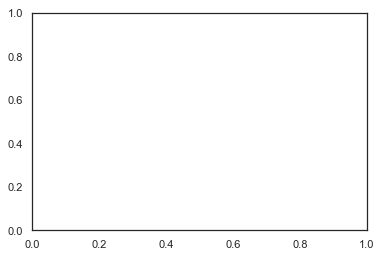

In [28]:
fig, ax = plt.subplots()
for color in ['green', 'blue']:
    x = standardY1
    y = standard1
    scale = 200.0
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

Our last visual represents the true Y values vs our predicted values, which appears to have a pretty similar layout. 